In [495]:
#We are importing all the required libraries here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import datetime
import time
from matplotlib import style
import statsmodels.api as sm
# plt.style()
plt.style.available
sns.set(style="darkgrid", context="talk", color_codes=True)  
%matplotlib inline

In [496]:
countries = pd.read_csv('Countries.csv')

In [497]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [498]:
del countries['Region']

In [499]:
plot_cols2=['Net migration','Birthrate','Deathrate','Agriculture','Industry','Service','Pop. Density (per sq. mi.)'
      ,'Coastline (coast/area ratio)','Literacy (%)','Arable (%)','Crops (%)',
            'Phones (per 1000)','Infant mortality (per 1000 births)','Other (%)','Climate']

for x in plot_cols2:
    
    countries[x]=countries[x].str.split(',')
    countries[x]=countries[x].astype(object)
    countries[x]=countries[x].str.join('.')
    countries[x]=countries[x].astype(float)

In [500]:
countries.head()

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [501]:
# DROPPING ROWS WITH MISSING VALUES.
countries=countries.dropna()

In [502]:
countries.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

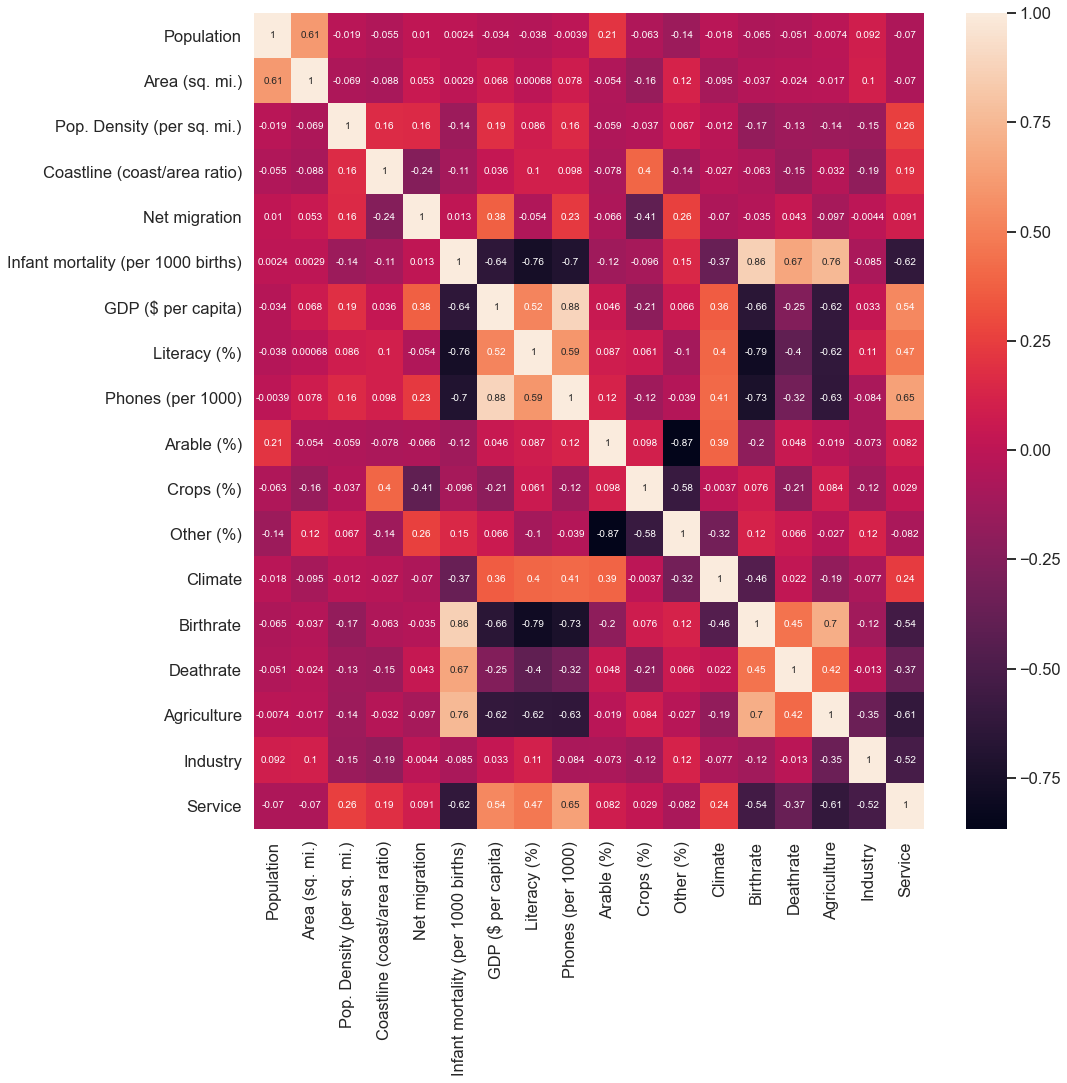

In [503]:
# CORRELATION MATRIX.
corrMatrix = countries.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [504]:
countries.shape

(179, 19)

In [505]:
countries.head(0)

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [506]:
# DROPPING UNNECESSARY COLUMNS.
countries.drop(['Net migration','Arable (%)','Crops (%)','Pop. Density (per sq. mi.)', 'Area (sq. mi.)','Industry',
                'Deathrate','Population','Coastline (coast/area ratio)','Other (%)','Climate','Service','Literacy (%)'],axis=1,inplace=True)

In [507]:
countries.head()

,Country,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Birthrate,Agriculture
0,Afghanistan,163.07,700.0,3.2,46.60,0.380
1,Albania,21.52,4500.0,71.2,15.11,0.232
2,Algeria,31.00,6000.0,78.1,17.14,0.101
6,Anguilla,21.03,8600.0,460.0,14.17,0.040
7,Antigua & Barbuda,19.46,11000.0,549.9,16.93,0.038


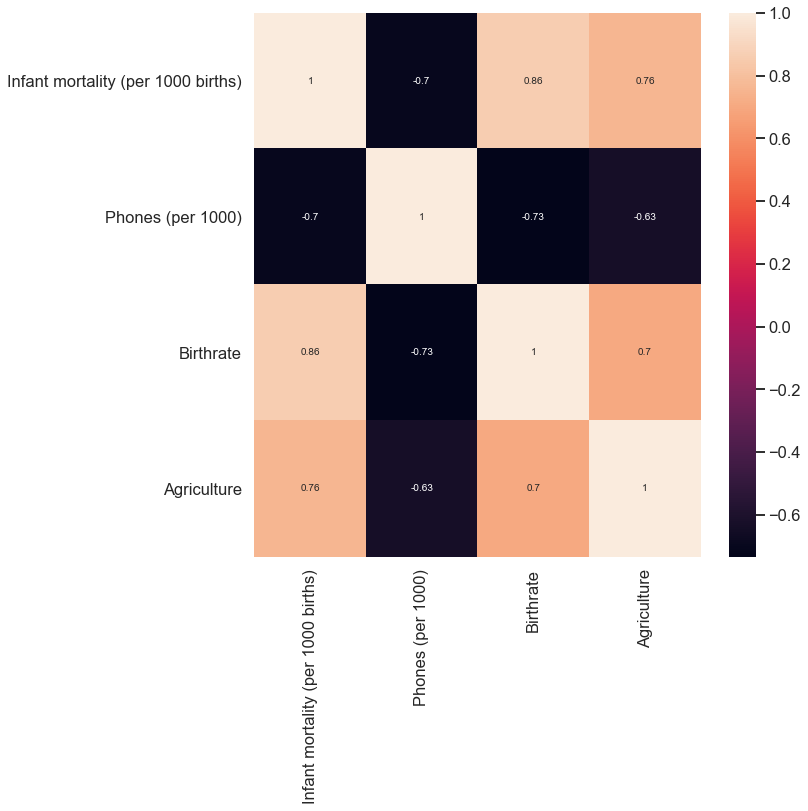

In [508]:
plt.figure(figsize=[10,10])
sns.heatmap(countries.drop('GDP ($ per capita)',axis=1).corr(),annot=True)

In [509]:
countries=pd.get_dummies(countries)

In [510]:
predictors=countries['Birthrate']
target=countries['GDP ($ per capita)']

In [511]:
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.20e-23
Time:                        08:22:27   Log-Likelihood:                -1844.7
No. Observations:                 179   AIC:                             3693.
Df Residuals:                     177   BIC:                             3700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.211e+04   1240.137     17.829      0.0

In [512]:
# predictors=countries['Literacy (%)']
# import statsmodels.api as sm
# predictors= sm.add_constant(predictors)
# lm_1 = sm.OLS(target,predictors).fit()
# print(lm_1.summary())

# #REMOVE

In [513]:
# setting phones per 1000 as a predictor.
predictors=countries['Phones (per 1000)']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     629.8
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           3.38e-60
Time:                        08:22:27   Log-Likelihood:                -1759.9
No. Observations:                 179   AIC:                             3524.
Df Residuals:                     177   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               684.8050    477.25

In [514]:
# predictors=countries['Service']
# import statsmodels.api as sm
# predictors= sm.add_constant(predictors)
# lm_1 = sm.OLS(target,predictors).fit()
# print(lm_1.summary())

# #remove

In [515]:
predictors=countries['Infant mortality (per 1000 births)']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           6.17e-22
Time:                        08:22:27   Log-Likelihood:                -1848.7
No. Observations:                 179   AIC:                             3701.
Df Residuals:                     177   BIC:                             3708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [516]:
countries.shape

(179, 184)

In [517]:
# have low correlation.
cols_to_drop=countries.corr()[(countries.corr()['GDP ($ per capita)']<=0.5) & (countries.corr()['GDP ($ per capita)']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)

In [518]:
countries.drop(cols_to_drop,axis=1,inplace=True)

In [519]:
countries.shape

(179, 5)

In [520]:
countries.head()

,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Birthrate,Agriculture
0,163.07,700.0,3.2,46.60,0.380
1,21.52,4500.0,71.2,15.11,0.232
2,31.00,6000.0,78.1,17.14,0.101
6,21.03,8600.0,460.0,14.17,0.040
7,19.46,11000.0,549.9,16.93,0.038


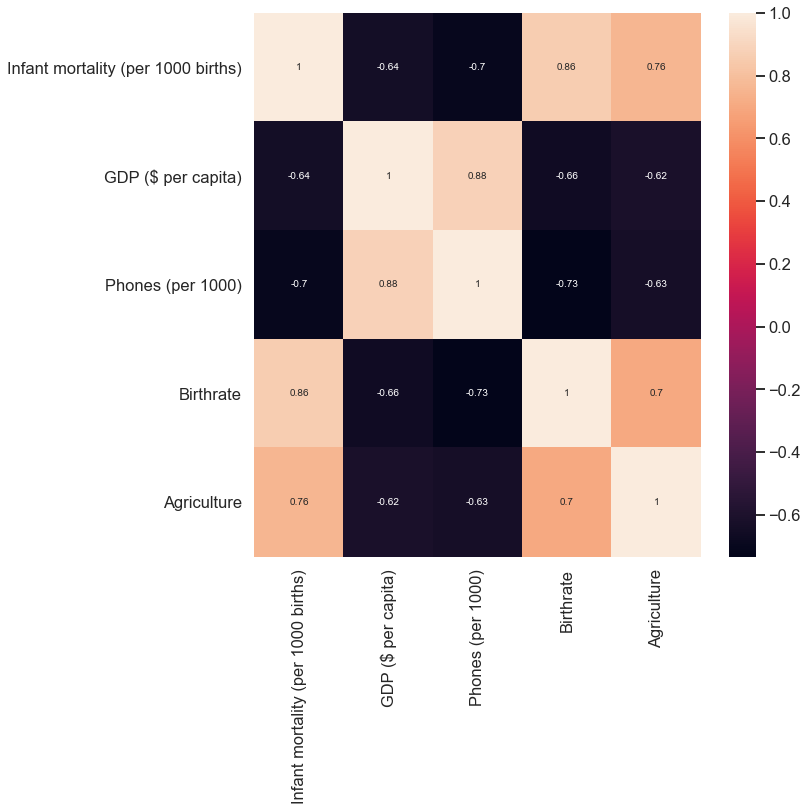

In [521]:
plt.figure(figsize=[10,10])
sns.heatmap(countries.corr(),annot=True)

In [522]:
countries.head()

,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Birthrate,Agriculture
0,163.07,700.0,3.2,46.60,0.380
1,21.52,4500.0,71.2,15.11,0.232
2,31.00,6000.0,78.1,17.14,0.101
6,21.03,8600.0,460.0,14.17,0.040
7,19.46,11000.0,549.9,16.93,0.038


In [523]:
countries.shape

(179, 5)

In [524]:
# setting what we want to predict as 'target' and what we use to predict as 'predictors'
predictors=countries.drop('GDP ($ per capita)',axis=1)
target=countries['GDP ($ per capita)']

In [525]:
#Phones per 1000 and infant mortality are taken as a predictor here.
predictorsx=predictors['Phones (per 1000)']
import statsmodels.api as sm
predictorsx= sm.add_constant(predictorsx)
lm_x = sm.OLS(target,predictorsx).fit()
print(lm_x.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     629.8
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           3.38e-60
Time:                        08:22:27   Log-Likelihood:                -1759.9
No. Observations:                 179   AIC:                             3524.
Df Residuals:                     177   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               684.8050    477.25

Mean_Squared_Error : 20291478.61835974
r_square_value : 0.7806077766657586


Text(0, 0.5, 'GDP')

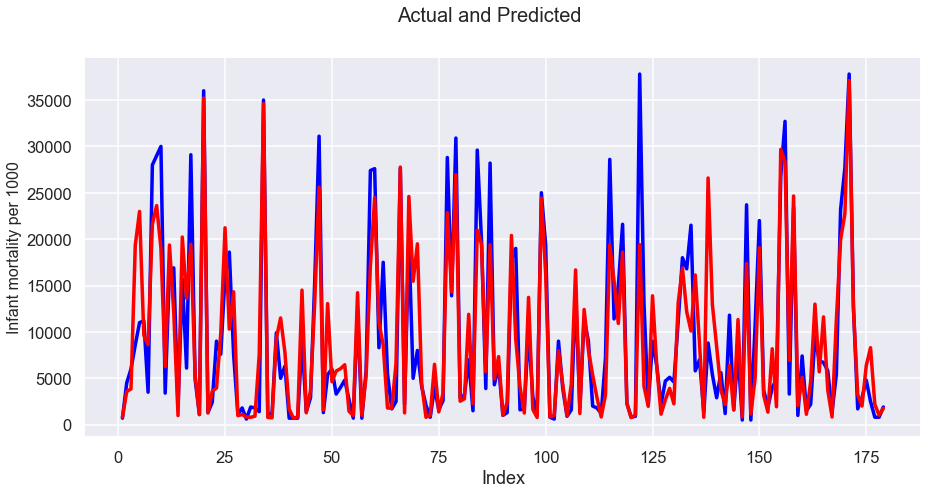

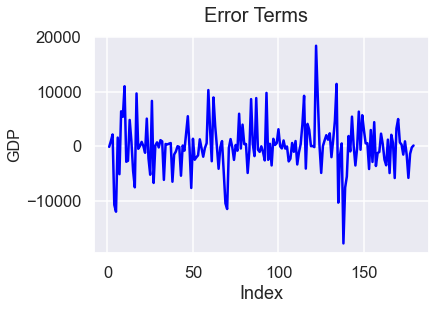

In [526]:
pred=lm_x.predict(predictorsx)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Infant mortality per 1000', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_x.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('GDP', fontsize=16)    

# we can't use this because phones per 1000 and infant mortality are negatively correlated

In [527]:
#Phones per 1000 is taken as a predictor here.
predictors1=predictors['Phones (per 1000)']
import statsmodels.api as sm
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     629.8
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           3.38e-60
Time:                        08:22:28   Log-Likelihood:                -1759.9
No. Observations:                 179   AIC:                             3524.
Df Residuals:                     177   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               684.8050    477.25

Mean_Squared_Error : 20291478.61835974
r_square_value : 0.7806077766657586


Text(0, 0.5, 'GDP')

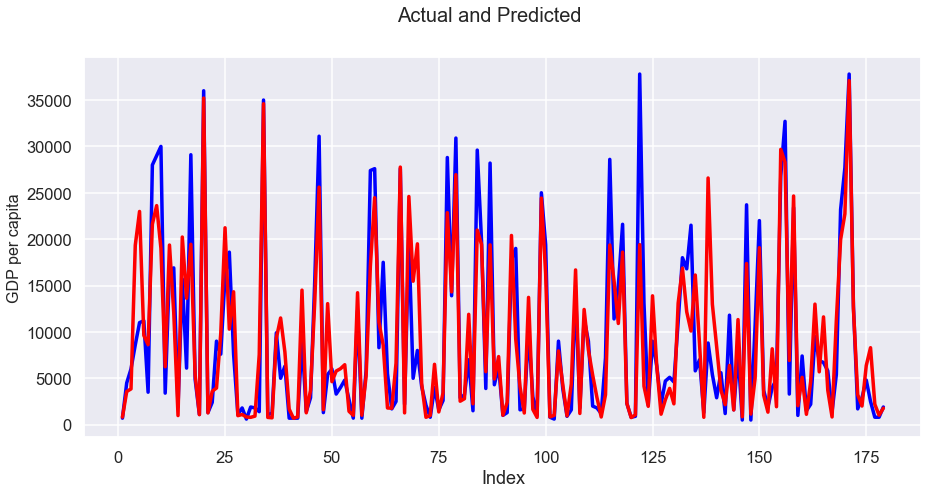

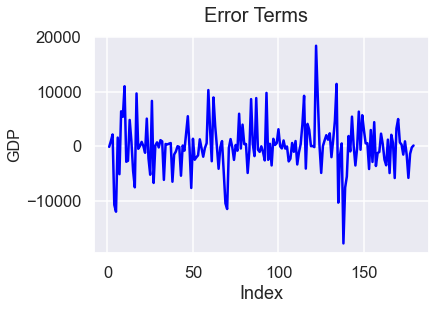

In [535]:
pred=lm_1.predict(predictors1)
c = [i for i in range(1,180,1)]
fig=plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('GDP per capita', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_1.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('GDP', fontsize=16)    

In [529]:
# Infant mortality is taken as a predictor here.
predictors2=predictors['Infant mortality (per 1000 births)']
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           6.17e-22
Time:                        08:22:28   Log-Likelihood:                -1848.7
No. Observations:                 179   AIC:                             3701.
Df Residuals:                     177   BIC:                             3708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Mean_Squared_Error : 54713479.05903167
r_square_value : 0.40843582457064276


Text(0, 0.5, 'GDP')

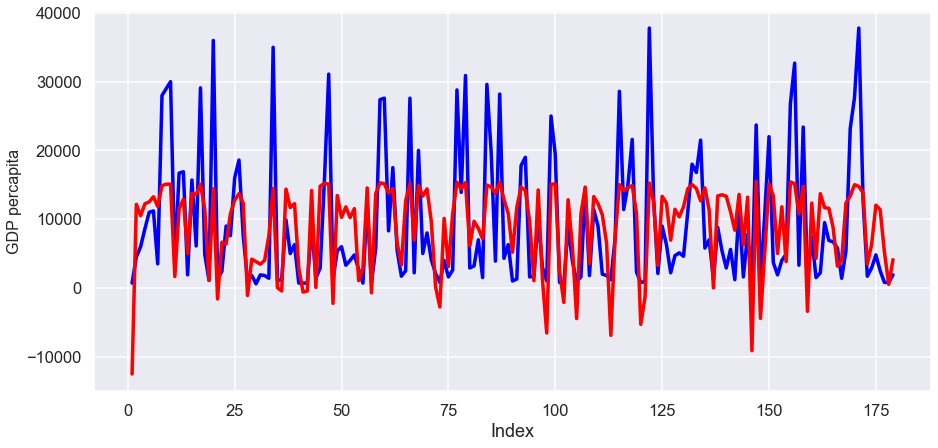

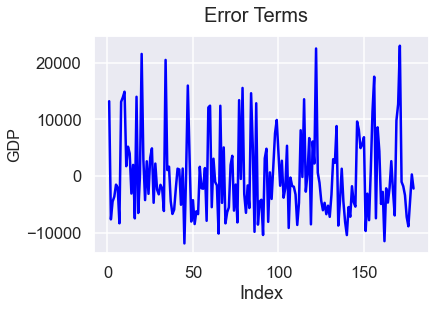

In [530]:
# Infant mortality is taken as a predictor here.
pred=lm_2.predict(predictors2)
c = [i for i in range(1,180,1)]
plt.figure(figsize=[15,7])
# fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('GDP percapita', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_2.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('GDP', fontsize=16)  

#Not a good model

In [531]:
# Birthrate is taken as a predictor here.
predictors3=predictors['Birthrate']
predictors3= sm.add_constant(predictors3)
lm_3 = sm.OLS(target,predictors3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.20e-23
Time:                        08:22:29   Log-Likelihood:                -1844.7
No. Observations:                 179   AIC:                             3693.
Df Residuals:                     177   BIC:                             3700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.211e+04   1240.137     17.829      0.0

Mean_Squared_Error : 52348002.76214295
r_square_value : 0.4340114424829473


Text(0, 0.5, 'GDP')

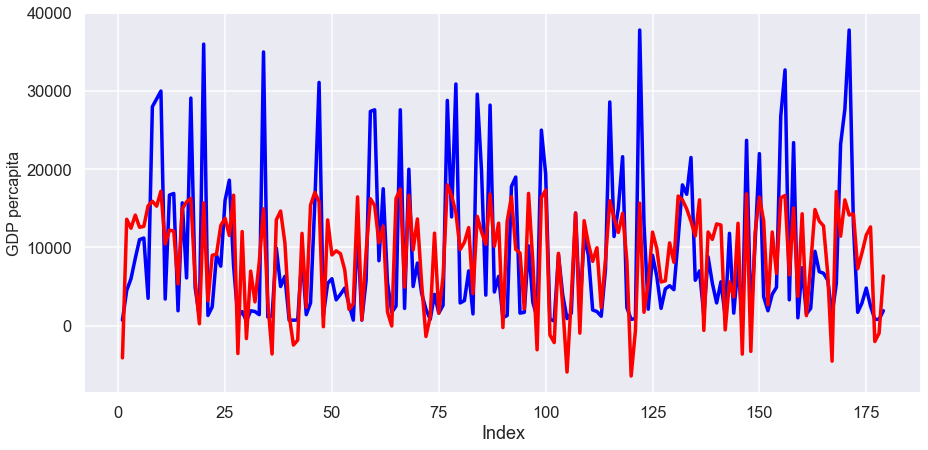

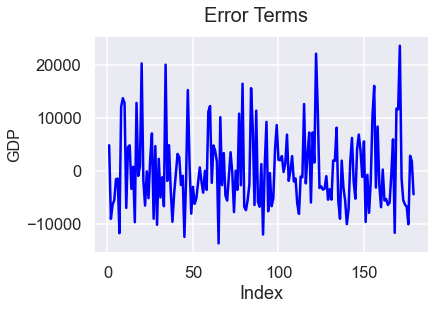

In [532]:
# Birthrate is taken as a predictor here.
pred=lm_3.predict(predictors3)
c = [i for i in range(1,180,1)]
plt.figure(figsize=[15,7])
# fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     # Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  # predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot title 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('GDP percapita', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_3.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              #  heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('GDP', fontsize=16)  
#not a good model

In [533]:
# Birthrate and phones per 1000 is taken as a predictor here.
predictors4=predictors[['Phones (per 1000)','Birthrate']]
predictors4= sm.add_constant(predictors4)
lm_4 = sm.OLS(target,predictors4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     313.6
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           9.56e-59
Time:                        08:22:29   Log-Likelihood:                -1759.8
No. Observations:                 179   AIC:                             3526.
Df Residuals:                     176   BIC:                             3535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1330.7062   1465.81

Mean_Squared_Error : 20266455.90266448
r_square_value : 0.7808783232007597


Text(0, 0.5, 'GDP')

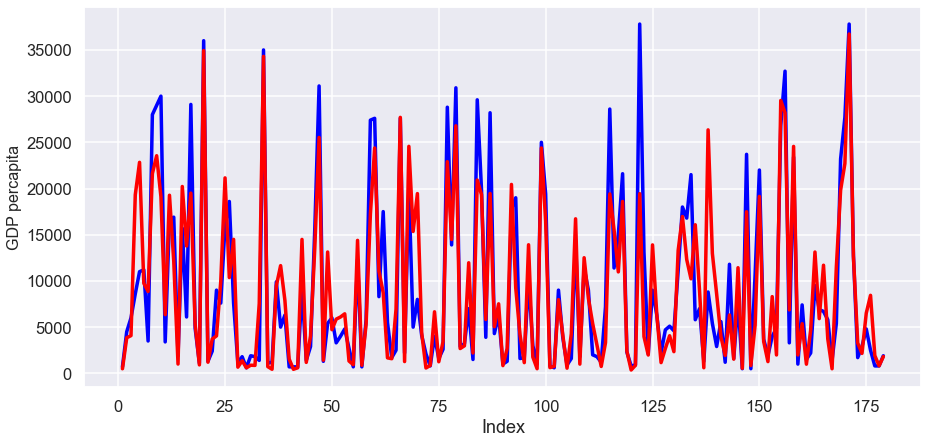

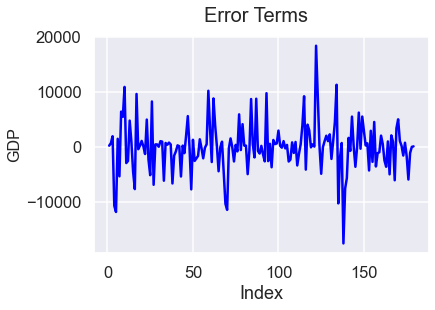

In [534]:

pred=lm_4.predict(predictors4)
c = [i for i in range(1,180,1)]
plt.figure(figsize=[15,7])
# fig = plt.figure()

plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #predicted
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('GDP percapita', fontsize=16)

mse=sm.tools.eval_measures.mse(pred, target, axis=0)
r_squared=lm_4.rsquared
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


c = [i for i in range(1,180,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)             
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('GDP', fontsize=16)  
#not a good model